In [75]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import fft, fftfreq
from scipy.signal import firwin, lfilter,freqz

In [76]:
def design_filter_fir(fc, fs, orden):
    b = firwin(orden, fc, fs=fs)
    return b

def aplicar_filtro_fir(senial, coeficientes):
    y = lfilter(coeficientes, 1.0, senial)
    return y

def graficar_fase_filtro(coeficientes, fs):
    w, h = freqz(coeficientes, worN=8000)
    phase = np.unwrap(np.angle(h))  # Fase en radianes, corregida para evitar discontinuidades
    # Graficar la fase de la respuesta en frecuencia,
    plt.figure(figsize=(10, 4))
    plt.plot(w * fs / (2 * np.pi), phase)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Fase (rad)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def graficar_respuesta_filtro(coeficientes, fs):
    w, h = freqz(coeficientes, worN=8000)
    mag = 20 * np.log10(np.abs(h))
    # Graficar la magnitud de la respuesta en frecuencia
    plt.figure(figsize=(10, 4))
    plt.plot(w * fs / (2 * np.pi), mag)
    plt.title('Respuesta en Frecuencia del Filtro FIR')
    plt.ylabel('Magnitud (dB)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def graficar_t(tiempo, senial_t, titulo, color = None):
    """
    Funcion que grafica una señal en funcion del tiempo.
    Entradas:
             tiempo: vector del eje del tiempo
             senial_t: vector que contiene la señal a graficar
             titulo: titulo de la grafica
    Salidas:
             Grafica la señal en funcion del tiempo.
    """
    if color is None: color = "b"
    else: color = color
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, senial_t, color, label = titulo)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.show()

def write_coe_file(coefficients, filename="coefficients.coe"):
    # Abrir el archivo .coe en modo de escritura
    with open(filename, "w") as file:
        file.write("radix=10;\n")
        file.write("coefdata=\n")
        
        # Escribir los coeficientes en el archivo .coe
        for i, coefficient in enumerate(coefficients):
            # Convertir el coeficiente a una cadena con varios dígitos después del punto decimal.
            coefficient_str = "{:.3f}".format(coefficient)
            file.write(coefficient_str)
            if i != len(coefficients) - 1:
                file.write(",\n")   # Si no es el ultimo.
            else:
                file.write(";\n")   # Si es el ultimo.
        
    print("Archivo {} generado exitosamente.".format(filename))

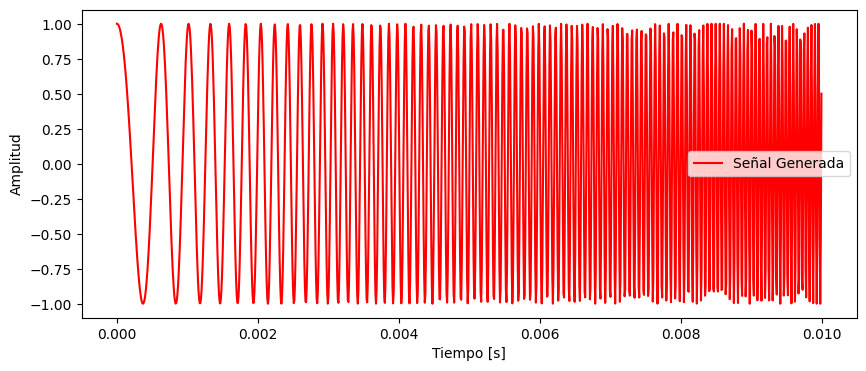

In [77]:
# Parámetros del filtro
order = 31
fs = 120e3  # Tasa de muestreo, Hz
cutoff_freq = 10e3  # Frecuencia de corte, Hz

# Generar señal de entrada
T = 10e-3  # segundos
F1 = 1e3
F2 = 20e3
n = int(T * fs)  # número total de muestras
t = np.linspace(0, T, n, endpoint=False)
s = np.cos(2 * np.pi * t * (F1 + (F2 - F1) / T / 2 * t))

graficar_t(t,s,"Señal Generada",'r')

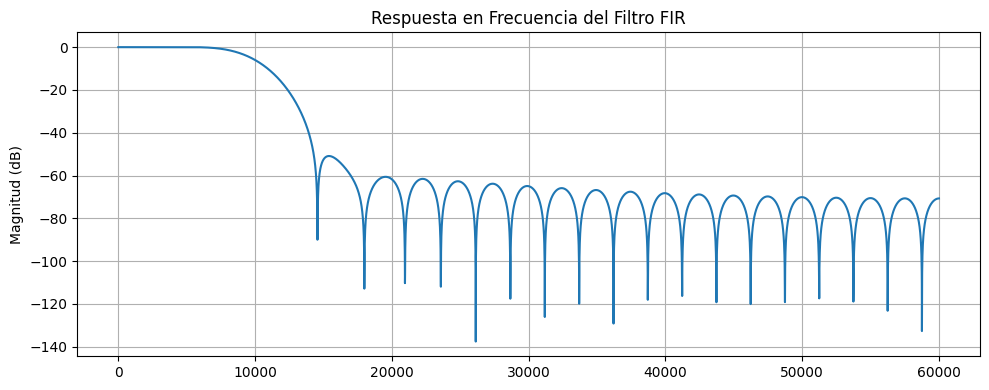

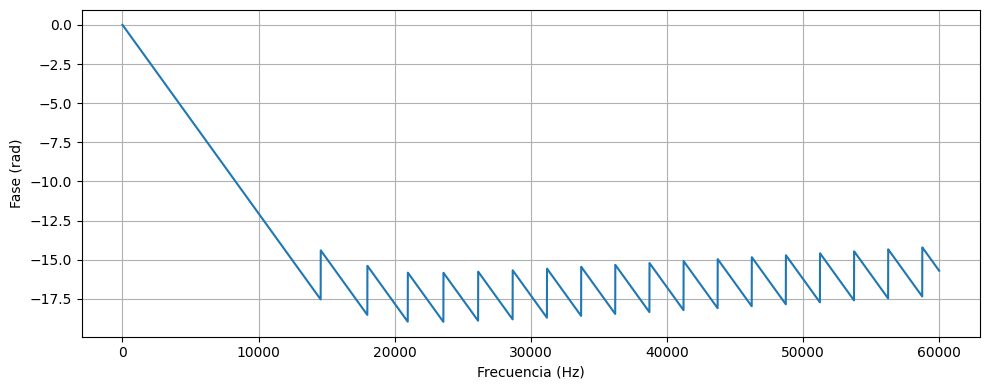

In [78]:
# Parámetros del filtro
fs = 120e3  # Frecuencia de muestreo en Hz
fc = 10e3  # Frecuencia de corte en Hz
orden = 47  # Orden del filtro

coeficientes_fir = design_filter_fir(fc, fs, orden)
graficar_respuesta_filtro(coeficientes_fir,fs)
graficar_fase_filtro(coeficientes_fir,fs)

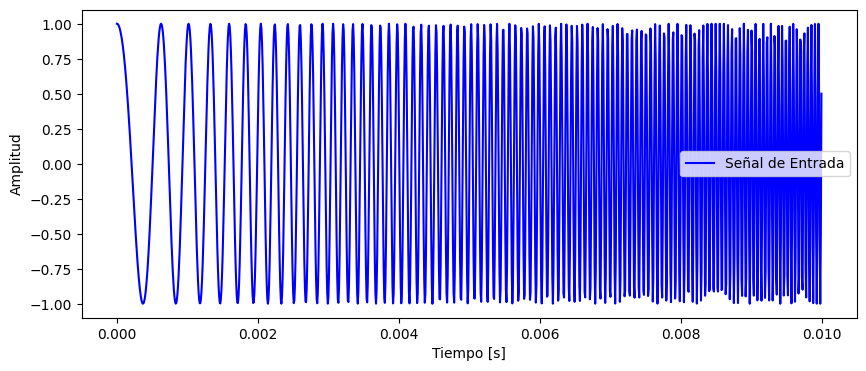

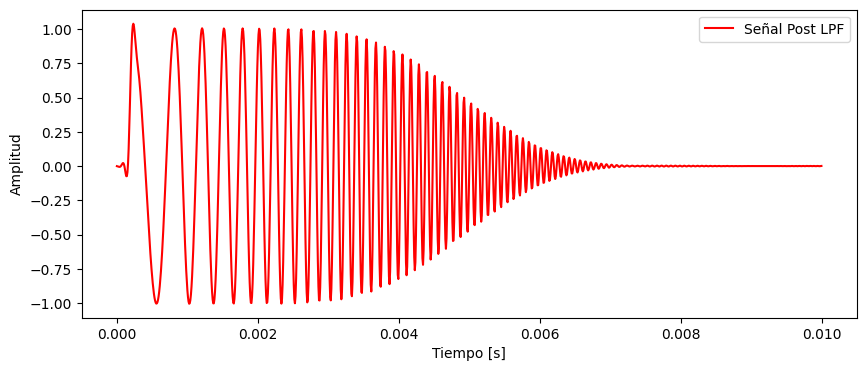

In [79]:
# Aplicar filtro pasa bajos FIR a la señal de entrada
s_postLPF = aplicar_filtro_fir(s,coeficientes_fir)
graficar_t(t,s,"Señal de Entrada",'b')
graficar_t(t,s_postLPF,"Señal Post LPF",'r')

In [80]:
write_coe_file(coeficientes_fir,filename="files/fir_LPF.coe")

Archivo files/fir_LPF.coe generado exitosamente.
